In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/youziya/Downloads/Customer_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(data)) * 100

missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_values_df.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173


In [3]:
# Handling missing values
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(), inplace=True)

# Confirming that there are no more missing values
missing_values_after = data.isnull().sum().sum()
missing_values_after


0

In [4]:
# Removing the "CUST_ID" column
data_cleaned = data.drop(columns=['CUST_ID'])

# Displaying the first few rows of the cleaned dataset
data_cleaned.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying standard scaling to all the features
data_scaled = scaler.fit_transform(data_cleaned)

# Creating a DataFrame from the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data_cleaned.columns)

# Displaying the first few rows of the scaled dataset
data_scaled_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


In [6]:
import numpy as np

# Function to calculate the number of outliers in each feature
def detect_outliers(data):
    outliers_dict = {}
    for column in data.columns:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)]
        outliers_dict[column] = len(outliers)
    return outliers_dict

# Detecting outliers in the scaled dataset
outliers_dict = detect_outliers(data_scaled_df)
outliers_dict_sorted = sorted(outliers_dict.items(), key=lambda x: x[1], reverse=True)
outliers_dict_sorted


[('BALANCE_FREQUENCY', 1493),
 ('PRC_FULL_PAYMENT', 1474),
 ('TENURE', 1366),
 ('CASH_ADVANCE', 1030),
 ('ONEOFF_PURCHASES', 1013),
 ('CASH_ADVANCE_TRX', 954),
 ('MINIMUM_PAYMENTS', 909),
 ('INSTALLMENTS_PURCHASES', 867),
 ('PURCHASES', 808),
 ('PAYMENTS', 808),
 ('ONEOFF_PURCHASES_FREQUENCY', 782),
 ('PURCHASES_TRX', 766),
 ('BALANCE', 695),
 ('CASH_ADVANCE_FREQUENCY', 525),
 ('CREDIT_LIMIT', 248),
 ('PURCHASES_FREQUENCY', 0),
 ('PURCHASES_INSTALLMENTS_FREQUENCY', 0)]

In [7]:
# Function to cap and floor outliers in the dataset
def cap_floor_outliers(data):
    for column in data.columns:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        data[column] = np.where(data[column] < Q1 - outlier_step, Q1 - outlier_step, data[column])
        data[column] = np.where(data[column] > Q3 + outlier_step, Q3 + outlier_step, data[column])
    return data

# Capping and flooring outliers in the scaled dataset
data_no_outliers = cap_floor_outliers(data_scaled_df.copy())

# Checking for outliers after capping and flooring
outliers_after = detect_outliers(data_no_outliers)
outliers_after_sorted = sorted(outliers_after.items(), key=lambda x: x[1], reverse=True)
outliers_after_sorted


[('BALANCE', 0),
 ('BALANCE_FREQUENCY', 0),
 ('PURCHASES', 0),
 ('ONEOFF_PURCHASES', 0),
 ('INSTALLMENTS_PURCHASES', 0),
 ('CASH_ADVANCE', 0),
 ('PURCHASES_FREQUENCY', 0),
 ('ONEOFF_PURCHASES_FREQUENCY', 0),
 ('PURCHASES_INSTALLMENTS_FREQUENCY', 0),
 ('CASH_ADVANCE_FREQUENCY', 0),
 ('CASH_ADVANCE_TRX', 0),
 ('PURCHASES_TRX', 0),
 ('CREDIT_LIMIT', 0),
 ('PAYMENTS', 0),
 ('MINIMUM_PAYMENTS', 0),
 ('PRC_FULL_PAYMENT', 0),
 ('TENURE', 0)]

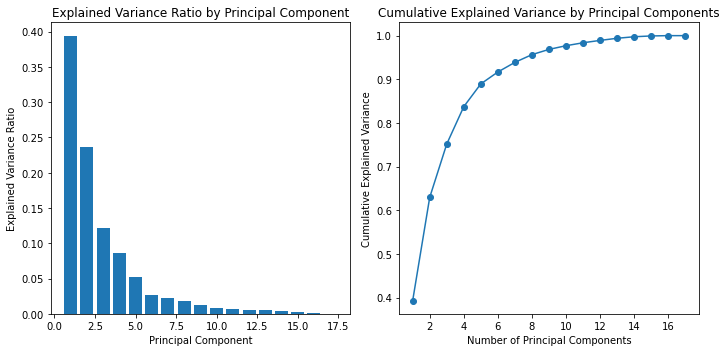

array([0.39346055, 0.62971184, 0.75183797, 0.83737983, 0.8894919 ,
       0.91671679, 0.93877405, 0.95646694, 0.96847829, 0.97691671,
       0.98366442, 0.9890726 , 0.99395659, 0.99742833, 0.99930768,
       1.        , 1.        ])

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA().fit(data_no_outliers)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')

plt.tight_layout()
plt.show()

# Displaying the cumulative explained variance
cumulative_explained_variance


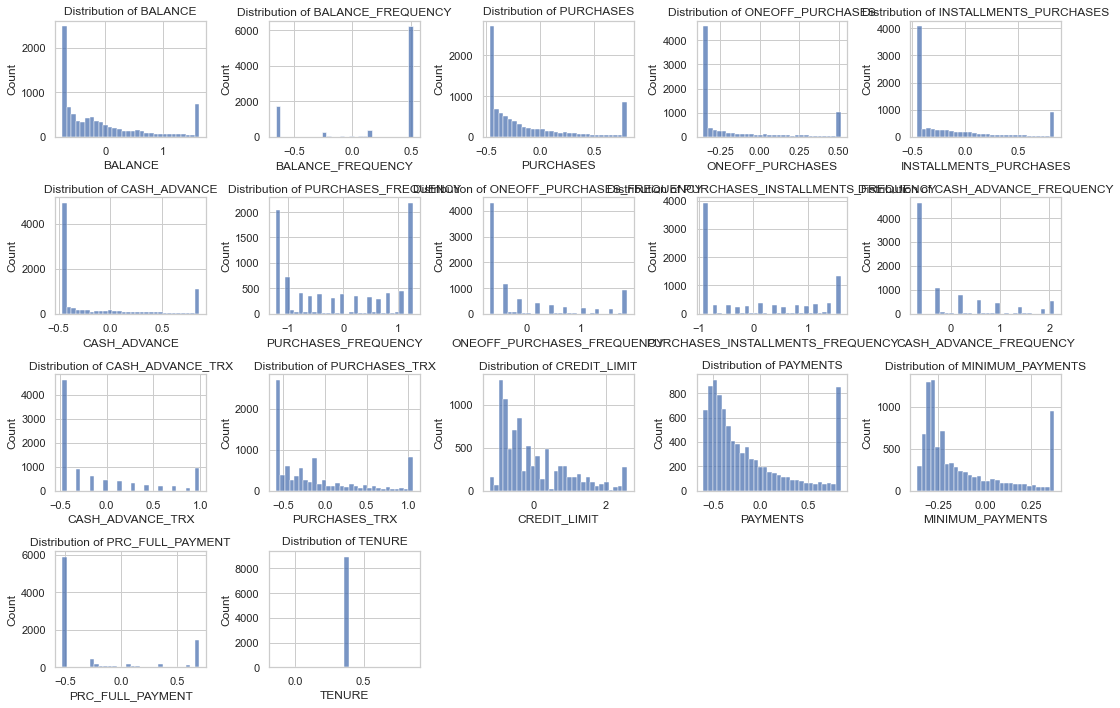

In [9]:
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of each feature
plt.figure(figsize=(15, 10))

for i, column in enumerate(data_no_outliers.columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(data_no_outliers[column], kde=False, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


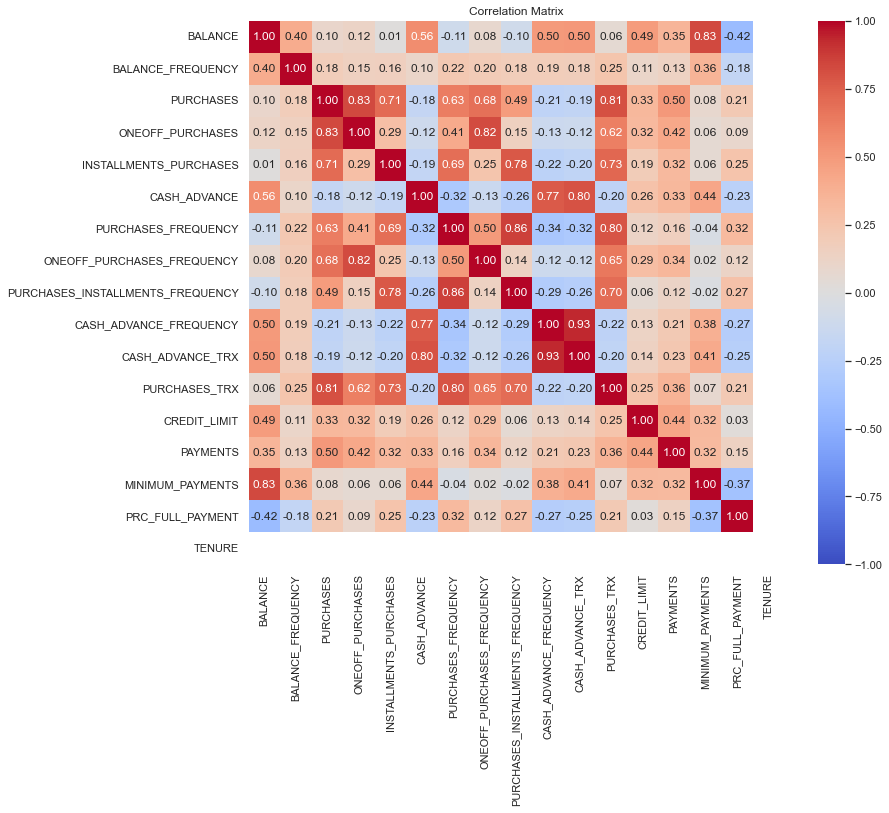

In [10]:
# Calculating the correlation matrix
correlation_matrix = data_no_outliers.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


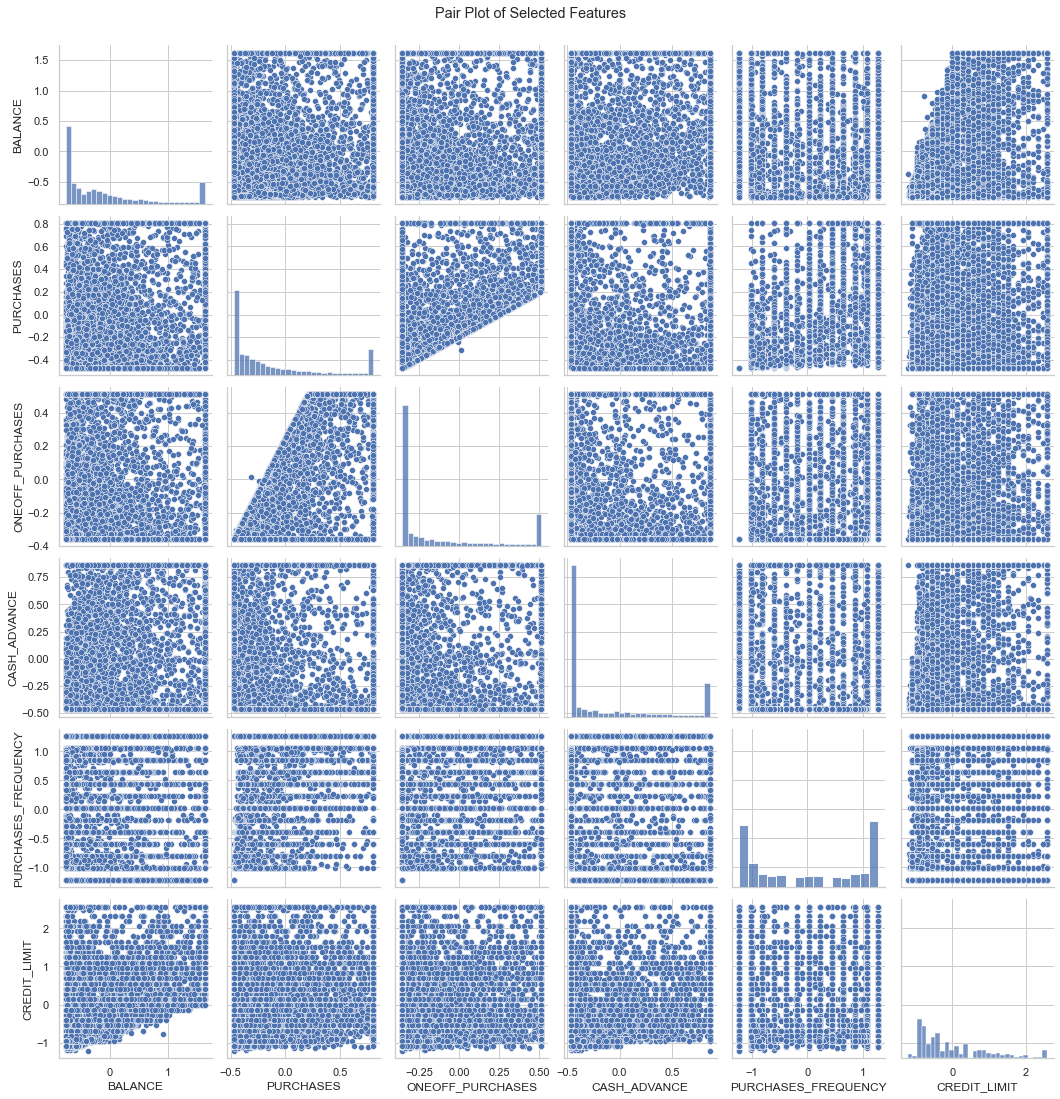

In [11]:
# Selecting a subset of features for the pair plot
selected_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']
data_subset = data_no_outliers[selected_features]

# Plotting the pair plot
sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


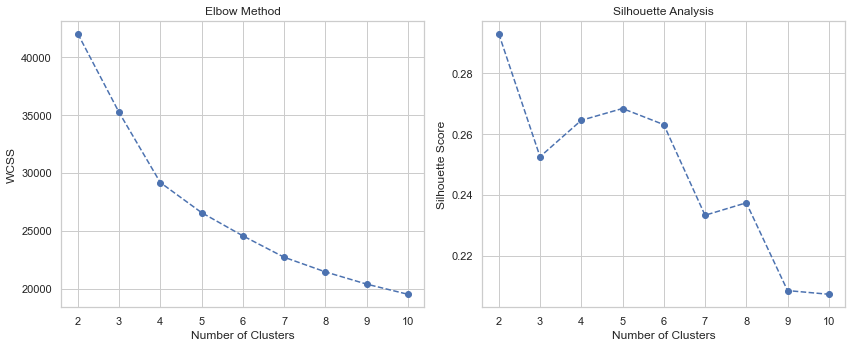

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to calculate WCSS (Within-Cluster-Sum-of-Squares)
def calculate_wcss(data):
    wcss = []
    for n in range(2, 11):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to calculate silhouette scores for different number of clusters
def calculate_silhouette(data):
    silhouette_scores = []
    for n in range(2, 11):
        kmeans = KMeans(n_clusters=n, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Calculating WCSS and silhouette scores
wcss = calculate_wcss(data_no_outliers)
silhouette_scores = calculate_silhouette(data_no_outliers)

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plotting the Silhouette Analysis graph
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.cluster import KMeans

# Applying K-Means clustering to the entire dataset with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
data_no_outliers['Cluster'] = kmeans.fit_predict(data_no_outliers)

# Displaying the first few rows of the dataset with cluster labels
data_no_outliers.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,0.861059,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068,1
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,1.835423,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068,0
3,0.049099,-0.654514,0.232058,0.512759,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068,1


In [17]:
sil_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red')
plt.title('K-means Clustering')
plt.show()


NameError: name 'X' is not defined

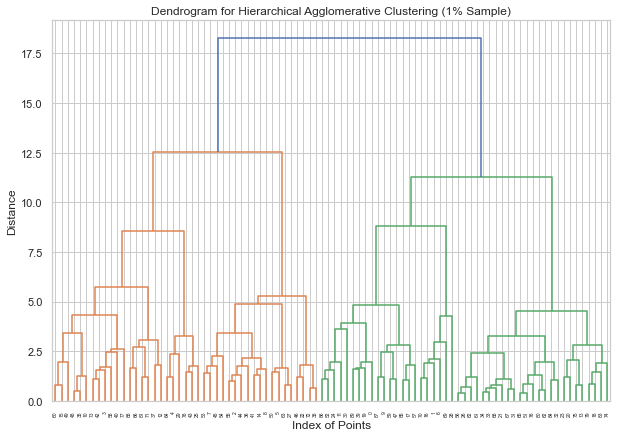

In [14]:
# Taking a random sample of 1% of the data for Hierarchical Agglomerative Clustering
data_sample_hac = data_no_outliers.sample(frac=0.01, random_state=42)

# Applying Hierarchical Agglomerative Clustering to the sample
linked_sample = linkage(data_sample_hac, 'ward')

# Plotting the Dendrogram for the sample
plt.figure(figsize=(10, 7))
dendrogram(linked_sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Agglomerative Clustering (1% Sample)')
plt.xlabel('Index of Points')
plt.ylabel('Distance')
plt.show()


In [16]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN to the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
data_no_outliers['DBSCAN_Cluster'] = dbscan.fit_predict(data_no_outliers.drop(columns=['Cluster']))

# Displaying the number of clusters and noise points found by DBSCAN
num_clusters = len(set(data_no_outliers['DBSCAN_Cluster'])) - (1 if -1 in data_no_outliers['DBSCAN_Cluster'] else 0)
num_noise_points = list(data_no_outliers['DBSCAN_Cluster']).count(-1)

num_clusters, num_noise_points


(29, 4829)

In [19]:
from sklearn.manifold import TSNE

# Taking a random sample of 1% of the data for K-Means and visualization
data_sample_kmeans = data_no_outliers.sample(random_state=42)

# Applying K-Means clustering to the sample
kmeans_sample = KMeans(n_clusters=2, random_state=42)
data_sample_kmeans['Cluster'] = kmeans_sample.fit_predict(data_sample_kmeans)

# Calculating Silhouette Score
silhouette_avg_sample = silhouette_score(data_sample_kmeans.drop(columns=['Cluster']), data_sample_kmeans['Cluster'])
print(f"Silhouette Score: {silhouette_avg_sample}")

# Using t-SNE for dimensionality reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
data_2D = tsne.fit_transform(data_sample_kmeans.drop(columns=['Cluster']))

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2D[:, 0], data_2D[:, 1], c=data_sample_kmeans['Cluster'], cmap='viridis')
plt.title('K-means Clustering (2D Visualization with t-SNE)')
plt.colorbar(label='Cluster')
plt.show()


ValueError: n_samples=1 should be >= n_clusters=2.